In [1]:
!ln -s ../data/ ./
!ln -s ../out/ ./

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

from sklearn.decomposition import PCA

In [19]:
def getKaggleMNIST():
    # MNIST data:
    # column 0 is labels
    # column 1-785 is data, with values 0 .. 255
    # total size of CSV: (42000, 1, 28, 28)
    train = pd.read_csv('data/train.csv').as_matrix().astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    
    return Xtrain, Ytrain, Xtest, Ytest


In [20]:
def main():
    Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

    pca = PCA()
    reduced = pca.fit_transform(Xtrain)
    plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.5)
    plt.show()

    plt.plot(pca.explained_variance_ratio_)
    plt.show()

    # cumulative variance
    # choose k = number of dimensions that gives us 95-99% variance
    cumulative = []
    last = 0
    for v in pca.explained_variance_ratio_:
        cumulative.append(last + v)
        last = cumulative[-1]
    plt.plot(cumulative)
    plt.show()


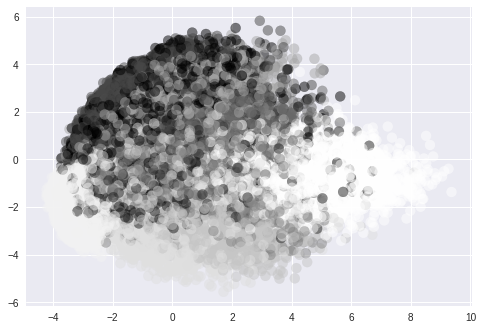

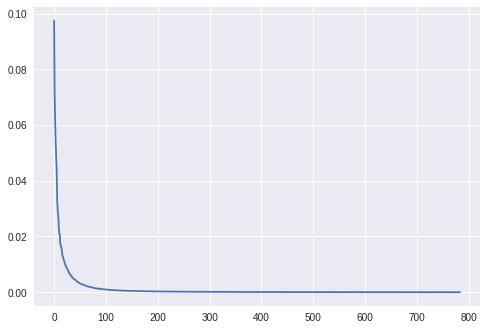

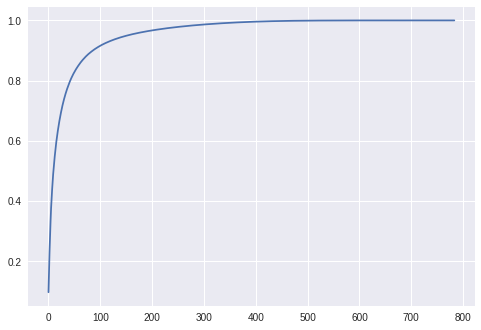

In [21]:
main()